# ROI analysis (Maastricht replication)

Analysis for segmented regions of interest: volume, T1 values, any associated statistics

In [1]:
# initialize libraries
library(plyr)
#library(dplyr)
library(digest)
library(reshape2)
library(ggplot2)
library(stringr) # for dataframe string parsing

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
# initialize variables
df_rois <- read.table('~/Documents/GitHub/zona-analysis/data/warped_seg_csv_MSTRCHT//combined_warp_seg_rois_MSTRCHT.csv', sep=",", header=TRUE)

df_rois <- subset(df_rois, subjid != "sub-C016" & subjid != "sub-C032") # outliers removed in QC process (misregistered)

tf <- ddply(df_rois, .(roi), summarize, t1map=mean(mean), t1map_sd=sd(mean))

# modify slightly so that ROIs categorized into GM,  WM, and "control" regions
cf <- data.frame(roi = tf$roi, class = c("GM","WM","WM","WM","WM","WM","WM","CTRL","GM","CTRL","GM"))
df_rois <- merge(df_rois,cf)

# order of presenting data (ZI, WM tracts of interest, control regions of interest)
roi_order <- c("cZI","rZI","ZI","fct","fl","ft","hf","hfields","ml","RN","STN")

names(df_rois)
head(df_rois)
str(df_rois)

[1] "roi"        "subjid"     "side"       "vol_voxels" "vol_mm"    
 [6] "centroid_x" "centroid_y" "centroid_z" "mean"       "sd"        
[11] "class"

roi,subjid,side,vol_voxels,vol_mm,centroid_x,centroid_y,centroid_z,mean,sd,class
cZI,sub-C001,L,209,71.67809,-9.043803,29.08042,9.768710,1569.627,125.1732,GM
cZI,sub-C002,L,243,83.33501,-11.250426,24.95548,6.806424,1553.058,145.4080,GM
cZI,sub-C003,L,273,93.63042,-9.670805,32.77368,-13.548924,1406.337,113.3867,GM
cZI,sub-C004,L,231,79.22143,-8.106102,29.03921,23.608868,1478.926,128.7002,GM
cZI,sub-C005,L,198,67.90260,-11.454126,26.52455,-6.823400,1491.232,170.7132,GM
cZI,sub-C006,L,192,65.84925,-14.273547,36.08856,-5.534143,1540.266,137.4254,GM


'data.frame':	660 obs. of  11 variables:
 $ roi       : Factor w/ 11 levels "cZI","fct","fl",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ subjid    : Factor w/ 32 levels "sub-C001","sub-C002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ side      : Factor w/ 2 levels "L","R": 1 1 1 1 1 1 1 1 1 1 ...
 $ vol_voxels: int  209 243 273 231 198 192 264 178 243 215 ...
 $ vol_mm    : num  71.7 83.3 93.6 79.2 67.9 ...
 $ centroid_x: num  -9.04 -11.25 -9.67 -8.11 -11.45 ...
 $ centroid_y: num  29.1 25 32.8 29 26.5 ...
 $ centroid_z: num  9.77 6.81 -13.55 23.61 -6.82 ...
 $ mean      : num  1570 1553 1406 1479 1491 ...
 $ sd        : num  125 145 113 129 171 ...
 $ class     : Factor w/ 3 levels "CTRL","GM","WM": 2 2 2 2 2 2 2 2 2 2 ...


In [3]:
# manipulations to make sure ordered in roi_order way for readability
df_rois$roi <- factor(df_rois$roi, levels = roi_order)
rowidx <- order(df_rois[,"roi"])

In [4]:
# summarize metrics for each ROI
#summary_all_roi_metrics <- ddply(df_rois, .(roi,side), summarize, vol_voxels_mean=mean(vol_voxels), vol_voxels_sd=sd(vol_voxels), vol_mm_mean=mean(vol_mm), vol_mm_sd=sd(vol_mm), t1map=mean(mean), t1map_sd=sd(mean))
#summary_all_roi_metrics

# data to be included in final table with coordinates
ddply(df_rois, .(roi), summarize, vol_voxels_mean=mean(vol_voxels), vol_voxels_sd=sd(vol_voxels), vol_mm_mean=mean(vol_mm), vol_mm_sd=sd(vol_mm), t1map=mean(mean), t1map_sd=sd(mean))

roi,vol_voxels_mean,vol_voxels_sd,vol_mm_mean,vol_mm_sd,t1map,t1map_sd
cZI,215.50000,31.94354,73.91232,10.957033,1444.663,61.00882
rZI,402.65000,54.56758,138.10139,18.720035,1414.974,52.85689
ZI,622.75000,77.20578,213.59141,26.485942,1424.936,54.08495
fct,324.86667,38.75891,111.42289,13.294712,1282.241,50.86669
fl,125.00000,18.94327,42.87265,6.498376,1340.961,45.41240
ft,202.91667,29.01040,69.59660,9.952046,1306.027,55.67068
hf,131.85000,16.76541,45.22204,5.751346,1316.911,59.37138
hfields,377.93333,51.37462,129.62399,17.624232,1319.101,51.33762
ml,83.06667,13.19330,28.49027,4.525522,1377.217,58.73371
RN,863.00000,89.63145,295.99230,30.748299,1249.778,56.39391


## Relaxometry Results

T1 relaxometry results. Clear differences in T1 relaxometry values for ZI versus surrounding white matter regions and also relative to surrounding gray matter structures (red nucleus and subthalamic nucleus).

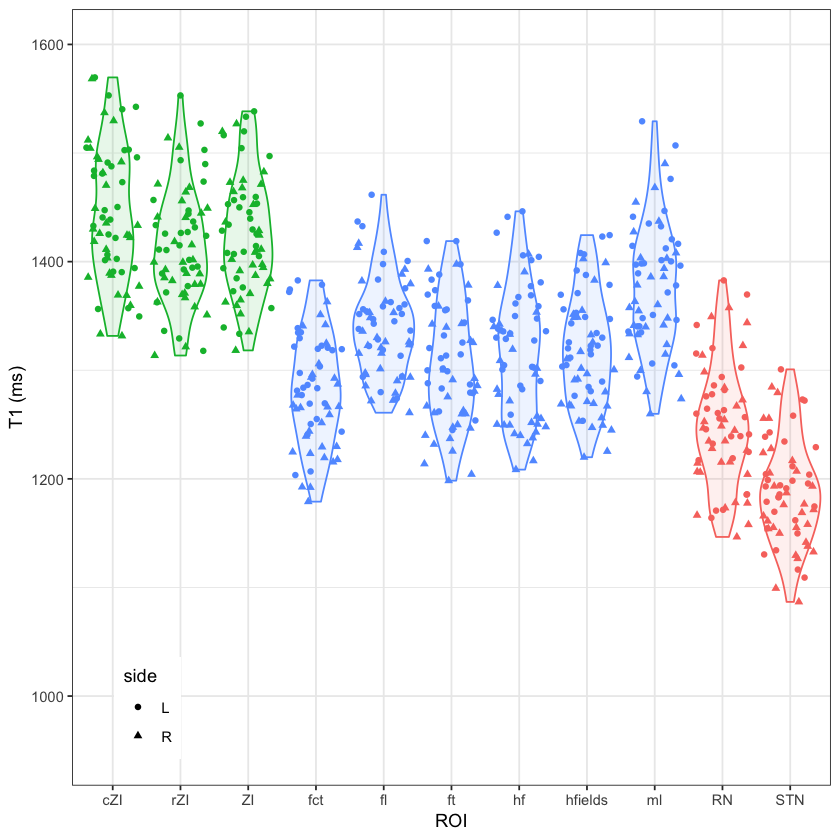

In [5]:
# create plot with specific ROI ordering
roi_order <- c("cZI","rZI","ZI","fct","fl","ft","hf","hfields","ml","RN","STN")
g <- ggplot(data = df_rois, aes(roi,mean)) + geom_violin(alpha = 0.1, aes(color=class,fill=class)) +
    geom_jitter(aes(color=class,shape=side)) +
    scale_x_discrete(name="ROI",limits=roi_order) +
    scale_y_continuous(name="T1 (ms)",limits=c(950,1600)) +
    theme_bw() + guides(size = "legend", colour = "none", fill = "none") +
    theme(legend.position=c(0.1, 0.1))
g


In [6]:
pdf(file = "~/Documents/GitHub/zona-analysis/figures/fig_T1_relaxometry_MSTRCHT.pdf", width = 5, height = 5)
g
dev.off()

pdf 
  2

In [7]:
unique(df_rois$roi)

[1] cZI     fct     fl      ft      hf      hfields ml      RN      rZI    
[10] STN     ZI     
Levels: cZI rZI ZI fct fl ft hf hfields ml RN STN

Statistical testing using wilcoxon testing with bonferonni adjustment demonstrating significant differences between ZI and other regions.

In [8]:
wt <- wilcox.test(x = subset(df_rois,roi=="cZI")$mean, y = subset(df_rois,roi=="ZI")$mean)
#wilcox.test(x = subset(df_rois,roi=="cZI")$mean, y = subset(df_rois,roi=="rZI")$mean)
#wilcox.test(x = subset(df_rois,roi=="cZI")$mean, y = subset(df_rois,roi=="fct")$mean)
#names(wt)

roi_df <- data.frame(roi1=character(),
                 roi2=character(), 
                 statistic=double(), 
                 p.value=double(),
                 stringsAsFactors=TRUE) 

# wilcox tests for cZI
for (curr_roi in unique(df_rois$roi))
{
    d <- ddply(df_rois, .(roi),
      function(x) {
          w <- wilcox.test(subset(df_rois,roi==curr_roi)$mean,x$mean,data=x)
          with(w,data.frame(statistic,p.value))
      })
    d <- cbind(curr_roi,d)
    roi_df <- rbind(roi_df,d)
    
}

#subset(roi_df)

In [9]:
unique(df_rois$roi)
roi_pvals <- subset(roi_df, (as.character(roi) > as.character(curr_roi))) # just get all the unique comparisons

# Multiple comparisons correction (Bonferroni)
roi_pvals$pval_adjusted <- p.adjust(roi_pvals$p.value,"bonferroni")
roi_pvals$pval_significant <- (roi_pvals$pval_adjusted < 0.05)

roi_pvals[,c(4,5)] <- round( roi_pvals[,c(4,5)], 4)
#subset(roi_pvals, pval_significant==TRUE) # only shows that were significant after correction
roi_pvals

[1] cZI     fct     fl      ft      hf      hfields ml      RN      rZI    
[10] STN     ZI     
Levels: cZI rZI ZI fct fl ft hf hfields ml RN STN

,curr_roi,roi,statistic,p.value,pval_adjusted,pval_significant
2,cZI,rZI,2290,0.0102,0.5606,FALSE
3,cZI,ZI,2112,0.1021,1.0000,FALSE
4,cZI,fct,3547,0.0000,0.0000,TRUE
5,cZI,fl,3296,0.0000,0.0000,TRUE
6,cZI,ft,3438,0.0000,0.0000,TRUE
7,cZI,hf,3347,0.0000,0.0000,TRUE
8,cZI,hfields,3398,0.0000,0.0000,TRUE
9,cZI,ml,2818,0.0000,0.0000,TRUE
10,cZI,RN,3572,0.0000,0.0000,TRUE
11,cZI,STN,3600,0.0000,0.0000,TRUE


## Volume Results

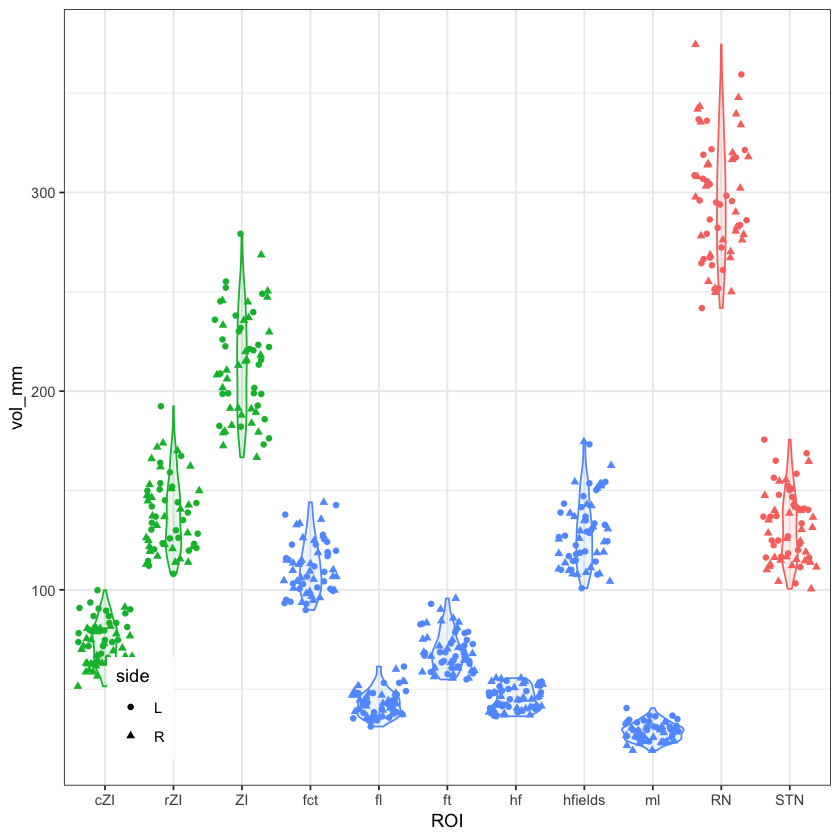

In [10]:
# plot: not necessary to include in main manuscript
#roi_order <- c("cZI","rZI","ZI","fct","fl","ft","hf","hfields","ml","RN","STN")
roi_order <- c("cZI","rZI","ZI","fct","fl","ft","hf","hfields","ml","RN","STN")
g <- ggplot(data = df_rois, aes(roi,vol_mm)) + geom_violin(alpha = 0.1, aes(color=class,fill=class)) +
    geom_jitter(aes(color=class,shape=side)) +
    scale_x_discrete(name="ROI",limits=roi_order) +
#    scale_y_continuous(name="T1 (ms)",limits=c(950,1400)) +
    theme_bw() + guides(size = "legend", colour = "none", fill = "none") +
    theme(legend.position=c(0.1, 0.1))
g

## Coordinates

Compute the coordinates for each CoM based on the midcommissural point.

Note: There is some deviations from the analysis (non-replication) analysis here. Since manual AFIDs placements were not performed in the replication dataset, the ACPC were instead placed by a single rater (JL) in the MSTRCHT template space and propagated over to each individual subject. Results were manually reviewed.

In [11]:
# initialize variables and load in all the afids data then calculate the MCP
setwd('~/Documents/GitHub/zona-analysis/data/input_acpc_MSTRCHT/')

df_afid <- read.table('~/Documents/GitHub/zona-analysis/etc/afids.csv', sep=",", header=TRUE)

df_subjects <- data.frame(fid=integer(),X=double(),Y=double(),Z=double(),
                        subjid=factor(), name=character(),description=character(),stringsAsFactors = FALSE)

csv_files <- list.files(".", "*.fcsv")

for (i in 1:length(csv_files)) {
        curr_split <- unlist(strsplit(csv_files[i],"_"))
        
        curr_subject <- read.table(csv_files[i], header=FALSE, sep=",")
        df_subject <- data.frame(fid = 1:length(curr_subject$V1))
        
        df_subject <- cbind(df_subject,X=curr_subject[2],Y=curr_subject[3],Z=curr_subject[4],
                          subjid=as.factor(curr_split[1]), name=curr_subject[12], description=curr_subject[13])
        
        df_subject <- plyr::rename(df_subject, c("V2"="X","V3"="Y","V4"="Z","V12"="name","V13"="description"))
        df_subjects <- rbind(df_subjects,df_subject)
}

df_AC <- subset(df_subjects, fid == 1)
df_PC <- subset(df_subjects, fid == 2)

df_ACPC <- merge(df_AC, df_PC, by=c("subjid"))
df_ACPC <- plyr::rename(df_ACPC, c("X.x"="AC_X","Y.x"="AC_Y","Z.x"="AC_Z",
                                   "X.y"="PC_X","Y.y"="PC_Y","Z.y"="PC_Z"))
df_ACPC <- subset(df_ACPC, select = c(subjid, AC_X, AC_Y, AC_Z, PC_X, PC_Y, PC_Z))
df_ACPC$MCP_X <- (df_ACPC$AC_X + df_ACPC$PC_X) / 2.0
df_ACPC$MCP_Y <- (df_ACPC$AC_Y + df_ACPC$PC_Y) / 2.0
df_ACPC$MCP_Z <- (df_ACPC$AC_Z + df_ACPC$PC_Z) / 2.0
#df_ACPC

In [12]:
# calculate the centroids for each structure after normalization
df_rois_with_MCP <- df_rois
#df_rois_with_MCP$MCP_centroid_x <- df_rois_with_MCP$centroid_x - subset(df_ACPC, )

dfm <- data.frame(  MCP_centroid_x = 1:length(df_rois_with_MCP$roi),
                    MCP_centroid_y = 1:length(df_rois_with_MCP$roi),
                    MCP_centroid_z = 1:length(df_rois_with_MCP$roi))

for (i in 1:length(df_rois_with_MCP$roi)) {
        
        dfm$MCP_centroid_x[i] <- df_rois_with_MCP$centroid_x[i] - subset(df_ACPC, subjid == df_rois_with_MCP$subjid[i] )$MCP_X
        dfm$MCP_centroid_y[i] <- df_rois_with_MCP$centroid_y[i] - subset(df_ACPC, subjid == df_rois_with_MCP$subjid[i] )$MCP_Y
        dfm$MCP_centroid_z[i] <- df_rois_with_MCP$centroid_z[i] - subset(df_ACPC, subjid == df_rois_with_MCP$subjid[i] )$MCP_Z

}

df_rois_with_MCP <- cbind(df_rois_with_MCP,dfm)
head(df_rois_with_MCP)


roi,subjid,side,vol_voxels,vol_mm,centroid_x,centroid_y,centroid_z,mean,sd,class,MCP_centroid_x,MCP_centroid_y,MCP_centroid_z
cZI,sub-C001,L,209,71.67809,-9.043803,29.08042,9.768710,1569.627,125.1732,GM,-11.67468,-8.412678,-3.988390
cZI,sub-C002,L,243,83.33501,-11.250426,24.95548,6.806424,1553.058,145.4080,GM,-12.64351,-9.048519,-3.522776
cZI,sub-C003,L,273,93.63042,-9.670805,32.77368,-13.548924,1406.337,113.3867,GM,-12.63208,-10.497171,-5.503984
cZI,sub-C004,L,231,79.22143,-8.106102,29.03921,23.608868,1478.926,128.7002,GM,-10.80889,-10.153837,-3.349282
cZI,sub-C005,L,198,67.90260,-11.454126,26.52455,-6.823400,1491.232,170.7132,GM,-12.30910,-8.543296,-4.505525
cZI,sub-C006,L,192,65.84925,-14.273547,36.08856,-5.534143,1540.266,137.4254,GM,-11.09905,-8.959094,-5.571054


In [13]:
# summarize metrics ROI (not lateralizing i.e. no side)
summary_all_roi_metrics_noside <- ddply(df_rois_with_MCP, .(roi), summarize,
    vol_mm_mean=mean(vol_mm), vol_mm_sd=sd(vol_mm),
    t1map=mean(mean), t1map_sd=sd(mean))
summary_all_roi_metrics_noside


roi,vol_mm_mean,vol_mm_sd,t1map,t1map_sd
cZI,73.91232,10.957033,1444.663,61.00882
rZI,138.10139,18.720035,1414.974,52.85689
ZI,213.59141,26.485942,1424.936,54.08495
fct,111.42289,13.294712,1282.241,50.86669
fl,42.87265,6.498376,1340.961,45.41240
ft,69.59660,9.952046,1306.027,55.67068
hf,45.22204,5.751346,1316.911,59.37138
hfields,129.62399,17.624232,1319.101,51.33762
ml,28.49027,4.525522,1377.217,58.73371
RN,295.99230,30.748299,1249.778,56.39391


In [14]:
# summarize metrics ROI and side
summary_all_roi_metrics <- ddply(df_rois_with_MCP, .(roi,side), summarize,
    vol_mm_mean=mean(vol_mm), vol_mm_sd=sd(vol_mm),
    t1map=mean(mean), t1map_sd=sd(mean),
    MCP_x_mean=mean(MCP_centroid_x), MCP_x_sd=sd(MCP_centroid_x),
    MCP_y_mean=mean(MCP_centroid_y), MCP_y_sd=sd(MCP_centroid_y),
    MCP_z_mean=mean(MCP_centroid_z), MCP_z_sd=sd(MCP_centroid_z))
summary_all_roi_metrics


roi,side,vol_mm_mean,vol_mm_sd,t1map,t1map_sd,MCP_x_mean,MCP_x_sd,MCP_y_mean,MCP_y_sd,MCP_z_mean,MCP_z_sd
cZI,L,79.45718,9.664415,1453.791,60.08385,-12.318732,0.8684939,-9.1110221,0.9730889,-5.1434468,1.1360220
cZI,R,68.36745,9.340272,1435.535,61.56334,12.877857,0.9383700,-8.0139697,1.1676228,-5.3604840,1.0923297
rZI,L,137.95850,18.492175,1423.288,55.36759,-7.068132,0.6899138,1.4145990,0.5474684,-1.6393623,0.4155480
rZI,R,138.24428,19.260341,1406.661,49.75412,7.083747,0.6294047,2.6466333,0.6916021,-1.9979195,0.4865993
ZI,L,217.32420,25.926347,1434.865,54.55036,-8.990475,0.6983176,-2.4428311,0.7517174,-2.9132919,0.5295036
ZI,R,209.85863,26.948029,1415.007,52.64520,9.013396,0.6662255,-0.9771288,0.9244273,-3.1681441,0.5205823
fct,L,111.05702,13.469173,1300.421,46.91089,-10.423501,0.7686005,-6.1860287,0.8033693,-2.5021580,0.8851494
fct,R,111.78875,13.337840,1264.060,48.78069,10.396622,0.8217021,-5.0664282,0.9613190,-3.2150201,0.7872293
fl,L,42.79260,6.544517,1353.634,44.95058,-6.377416,0.7107294,2.7300168,0.5642293,-1.6806025,0.4252668
fl,R,42.95269,6.562773,1328.288,42.92836,6.674258,0.6740090,3.6854849,0.7116992,-1.8563216,0.5453745


## Manuscript Tables

In [15]:
formatted_summary_all_roi_metrics <- summary_all_roi_metrics[,1:2]

formatted_summary_all_roi_metrics$vol_mm <- paste0(
    sprintf( "%.1f", round(summary_all_roi_metrics$vol_mm_mean,1)), '±',
    sprintf( "%.1f", round(summary_all_roi_metrics$vol_mm_sd,1)))

formatted_summary_all_roi_metrics$t1map <- paste0(
    sprintf( "%.1f", round(summary_all_roi_metrics$t1map,1)), '±',
    sprintf( "%.1f", round(summary_all_roi_metrics$t1map_sd,1)))

formatted_summary_all_roi_metrics$MCP_x <- paste0(
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_x_mean,2)), '±',
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_x_sd,2)))

formatted_summary_all_roi_metrics$MCP_y <- paste0(
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_y_mean,2)), '±',
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_y_sd,2)))

formatted_summary_all_roi_metrics$MCP_z <- paste0(
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_z_mean,2)), '±',
    sprintf( "%.2f", round(summary_all_roi_metrics$MCP_z_sd,2)))

formatted_summary_all_roi_metrics

write.table(formatted_summary_all_roi_metrics, file = "~/Documents/GitHub/zona-analysis/data/output_tables/Table01_metrics_MSTRCHT.csv", row.names = FALSE, quote = FALSE, sep = ",")

roi,side,vol_mm,t1map,MCP_x,MCP_y,MCP_z
cZI,L,79.5±9.7,1453.8±60.1,-12.32±0.87,-9.11±0.97,-5.14±1.14
cZI,R,68.4±9.3,1435.5±61.6,12.88±0.94,-8.01±1.17,-5.36±1.09
rZI,L,138.0±18.5,1423.3±55.4,-7.07±0.69,1.41±0.55,-1.64±0.42
rZI,R,138.2±19.3,1406.7±49.8,7.08±0.63,2.65±0.69,-2.00±0.49
ZI,L,217.3±25.9,1434.9±54.6,-8.99±0.70,-2.44±0.75,-2.91±0.53
ZI,R,209.9±26.9,1415.0±52.6,9.01±0.67,-0.98±0.92,-3.17±0.52
fct,L,111.1±13.5,1300.4±46.9,-10.42±0.77,-6.19±0.80,-2.50±0.89
fct,R,111.8±13.3,1264.1±48.8,10.40±0.82,-5.07±0.96,-3.22±0.79
fl,L,42.8±6.5,1353.6±45.0,-6.38±0.71,2.73±0.56,-1.68±0.43
fl,R,43.0±6.6,1328.3±42.9,6.67±0.67,3.69±0.71,-1.86±0.55


In [16]:
formatted_summary_all_roi_metrics_noside <- summary_all_roi_metrics_noside[,1:2]

formatted_summary_all_roi_metrics_noside$vol_mm <- paste0(
    sprintf( "%.1f", round(summary_all_roi_metrics_noside$vol_mm_mean,1)), '±',
    sprintf( "%.1f", round(summary_all_roi_metrics_noside$vol_mm_sd,1)))

formatted_summary_all_roi_metrics_noside$t1map <- paste0(
    sprintf( "%.1f", round(summary_all_roi_metrics_noside$t1map,1)), '±',
    sprintf( "%.1f", round(summary_all_roi_metrics_noside$t1map_sd,1)))

formatted_summary_all_roi_metrics_noside[,c(1,3,4)]

# needs to be integrated into main table
write.table(formatted_summary_all_roi_metrics_noside, file = "~/Documents/GitHub/zona-analysis/data/output_tables/Table01_metrics_noside_MSTRCHT.csv", row.names = FALSE, quote = FALSE, sep = ",")

roi,vol_mm,t1map
cZI,73.9±11.0,1444.7±61.0
rZI,138.1±18.7,1415.0±52.9
ZI,213.6±26.5,1424.9±54.1
fct,111.4±13.3,1282.2±50.9
fl,42.9±6.5,1341.0±45.4
ft,69.6±10.0,1306.0±55.7
hf,45.2±5.8,1316.9±59.4
hfields,129.6±17.6,1319.1±51.3
ml,28.5±4.5,1377.2±58.7
RN,296.0±30.7,1249.8±56.4


In [17]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Catalina 10.15.2

Matrix products: default
BLAS/LAPACK: /Users/jclau/anaconda3/envs/r-tutorial/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] stringr_1.4.0  ggplot2_3.1.1  reshape2_1.4.3 digest_0.6.18  plyr_1.8.4    

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       magrittr_1.5     tidyselect_0.2.5 munsell_0.5.0   
 [5] uuid_0.1-2       colorspace_1.4-1 R6_2.4.0         rlang_0.3.4     
 [9] dplyr_0.8.0.1    tools_3.6.1      grid_3.6.1       gtable_0.3.0    
[13] withr_2.1.2      htmltools_0.3.6  assertthat_0.2.1 lazyeval_0.2.2  
[17] tibble_2.1.1     crayon_1.3.4     IRdisplay_0.7.0  purrr_0.3.2     
[21] repr_0.19.2      base64enc_0.1-3  IRkernel_0.8.15  glue_1.3.1      
[25] evaluate_0.13    la